In [118]:
import pandas as pd

In [119]:
dados = {
    "Data": ["2023-05-15", "2023-05-15", "2023-05-16", "2023-05-17", "2023-05-18", '2023-05-15'],
    "Produto": ["Notebook", "Smartphone", "Tablet", "Notebook", "Smartphone", None],
    "Quantidade": [1, 2, 3, 1, 2, 1],
    "Valor": [3000, 1500, 800, 2800, None, None]  # Note que há um valor ausente
}
df = pd.DataFrame(dados)

In [120]:
df.head()

,Data,Produto,Quantidade,Valor
0,2023-05-15,Notebook,1,3000.0
1,2023-05-15,Smartphone,2,1500.0
2,2023-05-16,Tablet,3,800.0
3,2023-05-17,Notebook,1,2800.0
4,2023-05-18,Smartphone,2,NaN


In [121]:
mask=df['Valor'].isnull()
df[mask]

,Data,Produto,Quantidade,Valor
4,2023-05-18,Smartphone,2,NaN
5,2023-05-15,None,1,NaN


In [122]:
df = df.reset_index()
df = df.set_index('Data')
df.head(6)

,index,Produto,Quantidade,Valor
Data,,,,
2023-05-15,0,Notebook,1,3000.0
2023-05-15,1,Smartphone,2,1500.0
2023-05-16,2,Tablet,3,800.0
2023-05-17,3,Notebook,1,2800.0
2023-05-18,4,Smartphone,2,NaN
2023-05-15,5,None,1,NaN


In [123]:
df.loc['2023-05-15']

,index,Produto,Quantidade,Valor
Data,,,,
2023-05-15,0,Notebook,1,3000.0
2023-05-15,1,Smartphone,2,1500.0
2023-05-15,5,None,1,NaN


In [124]:
df.iloc[2]

index              2
Produto       Tablet
Quantidade         3
Valor          800.0
Name: 2023-05-16, dtype: object

In [125]:
mask = (df['Produto'] == 'Notebook') & (df['Valor'] > 2)
df[mask]

,index,Produto,Quantidade,Valor
Data,,,,
2023-05-15,0,Notebook,1,3000.0
2023-05-17,3,Notebook,1,2800.0


In [126]:
mask = df['Valor'] > 1000
# df = df[mask]

In [127]:
df[mask][['Produto', 'Valor']]

,Produto,Valor
Data,,
2023-05-15,Notebook,3000.0
2023-05-15,Smartphone,1500.0
2023-05-17,Notebook,2800.0


In [142]:
df['Valor'].fillna(df['Valor'].mean(), inplace=True)

C:\Users\kauek\AppData\Local\Temp\ipykernel_3792\1634910710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Valor'].fillna(df['Valor'].mean(), inplace=True)


In [144]:
df.head(6)

,index,Produto,Quantidade,Valor
Data,,,,
2023-05-15,0,Notebook,1,3000.0
2023-05-15,1,Smartphone,2,1500.0
2023-05-16,2,Tablet,3,800.0
2023-05-17,3,Notebook,1,2800.0
2023-05-18,4,Smartphone,2,2025.0
2023-05-15,5,None,1,2025.0


In [148]:
df = df.dropna()
df.head(6)

,index,Produto,Quantidade,Valor
Data,,,,
2023-05-15,0,Notebook,1,3000.0
2023-05-15,1,Smartphone,2,1500.0
2023-05-16,2,Tablet,3,800.0
2023-05-17,3,Notebook,1,2800.0
2023-05-18,4,Smartphone,2,2025.0


In [150]:
print(df['Valor'].mean())

2025.0


In [152]:
# DESVIÃO PADRÃO
print(df['Valor'].std())

912.071817347735


In [156]:
mask = df['Produto'] == 'Notebook'
sum(df[mask]['Quantidade'])


2

In [171]:
products=list(set([p for p in df['Produto']]))
print(products)


['Smartphone', 'Notebook', 'Tablet']


In [ ]:
mask = df['Produto'] == 'Notebook'
sum(df[mask]['Quantidade'])

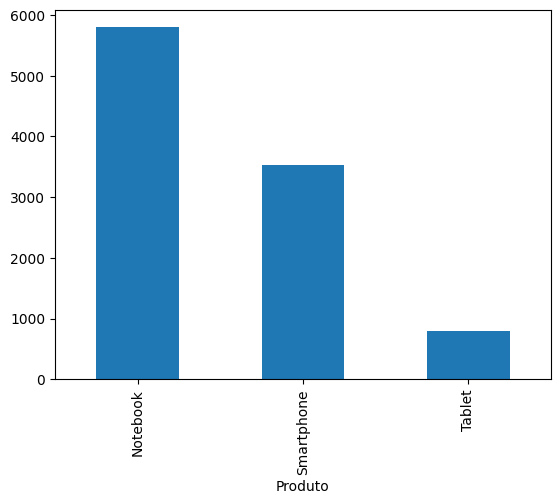

In [183]:
import matplotlib.pyplot as plt


venda_by_product = df.groupby('Produto')['Valor'].sum()

venda_by_product.plot.bar()


plt.show()